In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sys
sys.path.append("../../")
%matplotlib inline
# import wandb # This is optional 
# wandb.login(host = "https://genentech.wandb.io", key="local-34baa1e45b44d125f8875e0c1059a60f1d23225b")

In [3]:
# # Load data from Another Project 
# import wandb

# run = wandb.init(entity ='grelu', project="human-mpra-gosai-2023", name = "make_data") # Change depending on your projects
# artifact = run.use_artifact('dataset:v2')
# dir = artifact.download()

In [4]:
# Check Data 
datafile = pd.read_csv("artifacts/dataset:v2/dataset.csv.gz")
datafile.head()

,Unnamed: 0,chrom,seq,hepg2,k562,sknsh
0,0,chr7,CCTGGTCTTTCTTGCTAAATAAACATATCGTGCATCATCCAGATCT...,0.233601,0.060779,0.047194
1,1,chr1,CATAAAGATGAGGCTTGGCAAAGAACATCTCTCGGTGCCTCCCATT...,0.004565,0.379639,-0.244395
2,2,chr1,CATAAAGCCAATCACTGAGATGACAAGTACTGCCAGGAAAGAAGGC...,0.384537,0.036707,-0.004578
3,3,chr15,CATAAAGGCAGTGTAGACCCAAACAGTGAGCAGTAGCAAGATTTAT...,4.116494,4.508784,3.040183
4,4,chr12,CATAAAGGGCTGAACATGCTGTTGAAAAAATGTAGATATAAAAGTT...,1.423444,1.616602,1.335892


In [5]:
# Select data 
small_data = datafile.loc[ (datafile['chrom'] =="chr1") | (datafile['chrom'] =="chr2") |(datafile['chrom'] =="chr3") |(datafile['chrom'] =="chr4")  ]

In [6]:
from src.utils.sequence import seqs_to_one_hot

seq_x = [seqs_to_one_hot(seq)[:, 0, :] for seq in small_data['seq']]
x = np.array(seq_x)
print(x.shape) # Data Size 

(203842, 200, 4)


-0.059543326344230464
0.45173612353060855


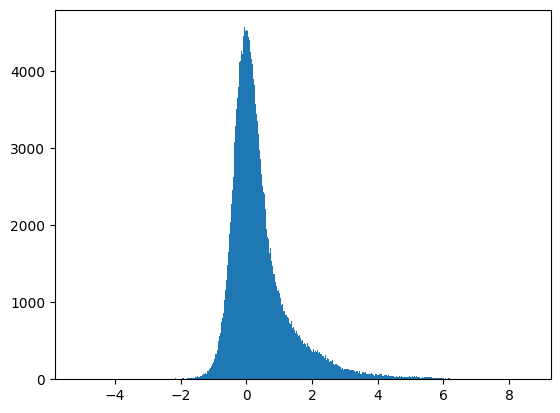

In [7]:
hepg2_scores = np.array(small_data['hepg2'])

import matplotlib.pyplot as plt
plt.hist(hepg2_scores, bins = 'auto')

print(np.quantile(hepg2_scores, 0.33))
print(np.quantile(hepg2_scores, 0.66))

In [8]:
labeling_function = lambda y: 2 if y > 0.5 else 1 if 0.1 < y <= 0.5 else 0

# Apply the lambda function to the 'k562' column
small_data['hepg2'] = small_data['hepg2'].apply(labeling_function)

hepg2_scores = np.array(small_data['hepg2'])

print((hepg2_scores == 0).sum())
print((hepg2_scores == 1).sum())
print((hepg2_scores == 2).sum())

91706
47020
65116


/tmp/ipykernel_3300114/671960128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_data['hepg2'] = small_data['hepg2'].apply(labeling_function)


In [10]:
# wandb.finish()

# Save Offline data for Training

In [ ]:
#run2 = wandb.init(entity ='grelu', project="Diffusion-DNA-RNA", name = "test") # Change depending on your projects

In [10]:
np.savez_compressed("./artifacts/MPRA-dataset:v2/y_HepG2_3class.npz", x = x, y = hepg2_scores)

In [ ]:
#dataset = wandb.Artifact("MPRA-dataset", type="dataset")
#dataset.add_dir("../data")
#run2.log_artifact(dataset)
#wandb.finish()

wandb: Adding directory to artifact (./../data)... Done. 8.3s


<Artifact MPRA-dataset>